In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [5]:
#import dataset
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [34]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape,labels,new_col
0,13.2,236,58,21.2,3,0
1,10.0,263,48,44.5,0,1
2,8.1,294,80,31.0,0,2
3,8.8,190,50,19.5,2,3
4,9.0,276,91,40.6,0,4
5,7.9,204,78,38.7,0,5
6,3.3,110,77,11.1,2,6
7,5.9,238,72,15.8,2,7
8,15.4,335,80,31.9,0,8
9,17.4,211,60,25.8,3,9


# Hierarchical clusturing

In [6]:
# Normalization function using min max scalar
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])

In [8]:
df_norm.head(10) #features

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


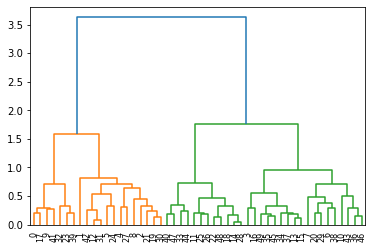

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward')) #ward linkage

In [12]:
??dendrogram

In [15]:
# create clusters  affinity is dist betwn 2 points
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [16]:
df_norm.shape

(50, 4)

In [17]:
hc.fit_predict(df_norm)

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [18]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [19]:
df_norm['h_clusterid'] = y_hc 

In [20]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


# K Means

In [21]:
from sklearn.cluster import KMeans

In [22]:
model_kmeans = KMeans(n_clusters=4) #4 is no of clustures if not mentioned takes defaukt vlue
model_kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [23]:
model_kmeans.labels_

array([3, 0, 0, 2, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 2, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2])

In [24]:
model_kmeans.inertia_

3.762798101294295

In [25]:
md=pd.Series(model_kmeans.labels_)

In [27]:
df["labels"]=pd.Series(model_kmeans.labels_)

In [28]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [29]:
df["new_col"]=df.index

In [30]:
df.groupby(["labels"])["new_col"].apply(lambda x:tuple(x)) #tells best clustre togather

labels
0      (1, 2, 4, 5, 8, 12, 19, 21, 24, 27, 30, 31, 42)
1     (11, 14, 18, 22, 25, 26, 28, 33, 40, 44, 47, 48)
2    (3, 6, 7, 10, 13, 15, 16, 20, 29, 34, 35, 36, ...
3                           (0, 9, 17, 23, 32, 39, 41)
Name: new_col, dtype: object

# DBSCAN

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [32]:
x,y=make_moons(100)
data=pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,0.099031,0.066116,1
1,0.926917,0.375267,0
2,0.050944,0.184892,1
3,1.926917,0.124733,1
4,-0.623490,0.781831,0


In [35]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df_norm)

DBSCAN(eps=1, min_samples=4)

In [36]:
# Adding clusters to dataset
df['clusters']=dbscan.labels_
df

,Murder,Assault,UrbanPop,Rape,labels,new_col,clusters
0,13.2,236,58,21.2,3,0,0
1,10.0,263,48,44.5,0,1,1
2,8.1,294,80,31.0,0,2,1
3,8.8,190,50,19.5,2,3,2
4,9.0,276,91,40.6,0,4,1
5,7.9,204,78,38.7,0,5,1
6,3.3,110,77,11.1,2,6,2
7,5.9,238,72,15.8,2,7,2
8,15.4,335,80,31.9,0,8,1
9,17.4,211,60,25.8,3,9,0


In [37]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,labels,new_col
,,mean,mean,mean,mean,mean,mean
0,0,14.671429,251.285714,54.285714,21.685714,3,23.000000
1,1,10.815385,257.384615,76.000000,33.192308,0,17.384615
2,2,6.055556,140.055556,71.333333,18.683333,2,26.777778
3,3,3.091667,76.000000,52.083333,11.833333,1,29.666667


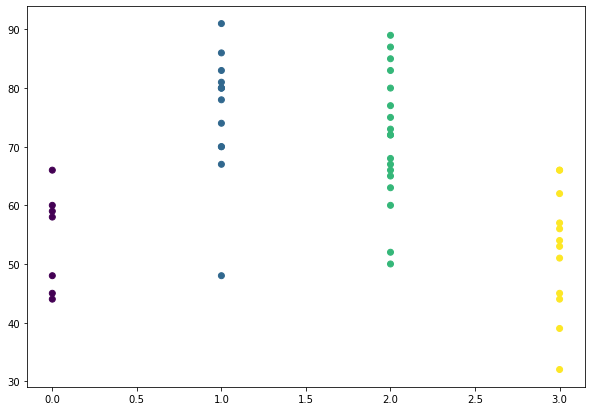

In [38]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_)